In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
#Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#SVMs - Support Vector Machines
from sklearn.svm import SVC
#GridSearchCV
from sklearn.model_selection import GridSearchCV
#KNN - k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn import tree
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
#K-means
from sklearn.cluster import KMeans
#Results
from sklearn.metrics import classification_report

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv("cumulative.csv")
df = df.drop(columns=["rowid", "kepid", "kepoi_name", "kepler_name", "koi_pdisposition", "koi_score", "koi_tce_delivname"])
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,FALSE POSITIVE,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,CONFIRMED,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
# Verify that all feature columns are either int or float - if not, would have to perform one-hot encoding
df.dtypes

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq              float64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num     float64
koi_steff            float64
koi_steff_err1       float64
koi_steff_err2       float64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

In [4]:
# Number of unique outcomes in the target column
df['koi_disposition'].value_counts()

FALSE POSITIVE    4358
CONFIRMED         2272
CANDIDATE         2114
Name: koi_disposition, dtype: int64

In [5]:
#Use LabelEncoder to convert the target column (which is presently categorical) to numerical
df['koi_disposition'] = LabelEncoder().fit_transform(df.values[:, 0])
df['koi_disposition'].value_counts()

2    4358
1    2272
0    2114
Name: koi_disposition, dtype: int64

In [6]:
# target = df['koi_disposition'].values.reshape(-1, 1)
target = df['koi_disposition'].values

In [7]:
features = df.drop("koi_disposition", axis=1)
feature_names = features.columns
features.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

# Pre-processing

Scale the data using the MinMaxScaler

In [9]:
X_scaler = MinMaxScaler().fit(X_train)

C:\Users\Ragavendar Kumar\Anaconda3\envs\PythonData\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# import matplotlib.pyplot as plt

# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["koi_period"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["koi_period"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Support Vector Machine

In [12]:
svm_model = SVC(kernel = 'linear') #can use 'poly','sigmoid','rbf' etc
svm_model.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8502592253735896
Testing Data Score: 0.838975297346752


In [14]:
predictions_svm = svm_model.predict(X_test_scaled)

In [15]:
print(classification_report(y_test, predictions_svm))

              precision    recall  f1-score   support

           0       0.73      0.56      0.63       523
           1       0.68      0.80      0.73       594
           2       0.98      1.00      0.99      1069

   micro avg       0.84      0.84      0.84      2186
   macro avg       0.80      0.78      0.79      2186
weighted avg       0.84      0.84      0.83      2186



# Hyperparameter Tuning - GridSearch

Use `GridSearchCV` to tune the `C` and `gamma` parameters

In [16]:
# Create the GridSearchCV model
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(svm_model, param_grid, verbose=3)

In [17]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\Ragavendar Kumar\Anaconda3\envs\PythonData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=1, gamma=0.0001, score=0.846892138939671, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8384439359267735, total=   0.9s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] ...... C=1, gamma=0.0001, score=0.8480549199084668, total=   1.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ........ C=1, gamma=0.001, score=0.846892138939671, total=   1.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8384439359267735, total=   0.6s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.8480549199084668, total=   0.5s
[CV] C=1, gamma=0.01 .................................................
[CV] ......... C=1, gamma=0.01, score=0.846892138939671, total=   0.6s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8384439359267735, total=   0.8s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.8480549199084668, total=   0.8s
[CV] C=5, gamma=0.0001 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   36.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [18]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'gamma': 0.0001}
0.8714547118023788


In [19]:
predictions_grid = grid.predict(X_test_scaled)

In [20]:
print(classification_report(y_test, predictions_grid))

              precision    recall  f1-score   support

           0       0.85      0.59      0.70       523
           1       0.72      0.88      0.79       594
           2       0.98      1.00      0.99      1069

   micro avg       0.87      0.87      0.87      2186
   macro avg       0.85      0.82      0.83      2186
weighted avg       0.88      0.87      0.87      2186



# KNN - K Nearest Neighbors

In [21]:
#choose k up to sqrt(len(X_train_scaled))
if (math.ceil(math.sqrt(len(X_train_scaled))) % 2 == 0):
    k_limit = math.ceil(math.sqrt(len(X_train_scaled)))+1
else:
    k_limit = math.ceil(math.sqrt(len(X_train_scaled)))

In [22]:
train_scores = []
test_scores = []

for i in range(1, k_limit+2, 2):
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train_scaled, y_train)
    
    train_score = knn_classifier.score(X_train_scaled, y_train)
    test_score = knn_classifier.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    
    print(f"k: {i}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.783
k: 3, Train/Test Score: 0.895/0.799
k: 5, Train/Test Score: 0.869/0.812
k: 7, Train/Test Score: 0.862/0.812
k: 9, Train/Test Score: 0.857/0.810
k: 11, Train/Test Score: 0.851/0.805
k: 13, Train/Test Score: 0.848/0.802
k: 15, Train/Test Score: 0.847/0.809
k: 17, Train/Test Score: 0.843/0.806
k: 19, Train/Test Score: 0.840/0.808
k: 21, Train/Test Score: 0.839/0.806
k: 23, Train/Test Score: 0.838/0.806
k: 25, Train/Test Score: 0.838/0.808
k: 27, Train/Test Score: 0.836/0.811
k: 29, Train/Test Score: 0.837/0.807
k: 31, Train/Test Score: 0.837/0.808
k: 33, Train/Test Score: 0.836/0.801
k: 35, Train/Test Score: 0.836/0.803
k: 37, Train/Test Score: 0.836/0.801
k: 39, Train/Test Score: 0.834/0.801
k: 41, Train/Test Score: 0.833/0.802
k: 43, Train/Test Score: 0.832/0.802
k: 45, Train/Test Score: 0.831/0.801
k: 47, Train/Test Score: 0.831/0.800
k: 49, Train/Test Score: 0.830/0.801
k: 51, Train/Test Score: 0.830/0.801
k: 53, Train/Test Score: 0.832/0.802
k: 55,

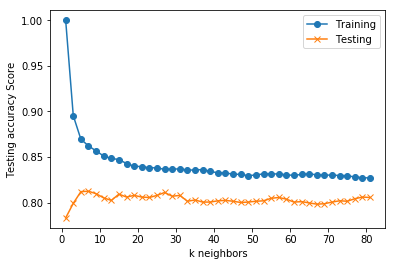

In [23]:
plt.plot(range(1, k_limit+2, 2), train_scores, marker='o', label = 'Training')
plt.plot(range(1, k_limit+2, 2), test_scores, marker="x", label = 'Testing')
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

In [24]:
new_knn_classifier = KNeighborsClassifier(n_neighbors=27)
new_knn_classifier.fit(X_train_scaled, y_train)
print('k=27 Test Acc: %.3f' % new_knn_classifier.score(X_test_scaled, y_test))

k=27 Test Acc: 0.811


In [25]:
predictions_knn = new_knn_classifier.predict(X_test_scaled)

In [26]:
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.69      0.43      0.53       523
           1       0.62      0.81      0.70       594
           2       0.98      1.00      0.99      1069

   micro avg       0.81      0.81      0.81      2186
   macro avg       0.76      0.75      0.74      2186
weighted avg       0.81      0.81      0.80      2186



# Decision Tree

In [27]:
dec_tree_classifier = tree.DecisionTreeClassifier().fit(X_train_scaled, y_train)

In [28]:
print(f"Decision Tree - Testing Data r2 Score: {dec_tree_classifier.score(X_test_scaled, y_test)}")

Decision Tree - Testing Data r2 Score: 0.8458371454711803


# Random Forest

In [29]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_scaled, y_train)

C:\Users\Ragavendar Kumar\Anaconda3\envs\PythonData\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
print(f"Random Forest - Testing Data r2 Score: {rf_classifier.score(X_test_scaled, y_test)}")

Random Forest - Testing Data r2 Score: 0.8755718206770357


In [31]:
# Importances
importances = rf_classifier.feature_importances_
importances

array([0.10768941, 0.07583415, 0.13204837, 0.02910557, 0.01844073,
       0.03328631, 0.01341257, 0.01438039, 0.02081319, 0.01322141,
       0.01785763, 0.0106638 , 0.00967316, 0.02108327, 0.01763109,
       0.05093568, 0.0259625 , 0.01175772, 0.01271063, 0.04539554,
       0.01281915, 0.02206523, 0.00981982, 0.01333732, 0.01310269,
       0.00960153, 0.05980389, 0.00262682, 0.00874055, 0.02171286,
       0.05628104, 0.00915953, 0.00818994, 0.01076095, 0.00914838,
       0.0104894 , 0.00775666, 0.0128546 , 0.01125132, 0.00857519])

In [32]:
sorted(zip(rf_classifier.feature_importances_, feature_names), reverse=True)

[(0.13204836752400778, 'koi_fpflag_co'),
 (0.10768941381203645, 'koi_fpflag_nt'),
 (0.07583414985618311, 'koi_fpflag_ss'),
 (0.05980389088875474, 'koi_model_snr'),
 (0.05628103640073941, 'koi_steff_err2'),
 (0.05093568165518446, 'koi_duration_err2'),
 (0.04539554087711278, 'koi_prad'),
 (0.03328631018477341, 'koi_period_err1'),
 (0.02910557190420293, 'koi_fpflag_ec'),
 (0.025962499530197698, 'koi_depth'),
 (0.02206523061113095, 'koi_prad_err2'),
 (0.021712856335793194, 'koi_steff_err1'),
 (0.02108327354236025, 'koi_duration'),
 (0.020813194281284926, 'koi_time0bk_err1'),
 (0.0184407272156544, 'koi_period'),
 (0.017857625768131106, 'koi_impact'),
 (0.017631093532678145, 'koi_duration_err1'),
 (0.014380385313810848, 'koi_time0bk'),
 (0.01341257146447685, 'koi_period_err2'),
 (0.013337315359965981, 'koi_insol'),
 (0.013221409600524068, 'koi_time0bk_err2'),
 (0.013102688671756868, 'koi_insol_err1'),
 (0.012854596544628168, 'ra'),
 (0.012819153571981481, 'koi_prad_err1'),
 (0.01271062998485

# Neural Network

In [33]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [34]:
#Create a normal neural network with 40 inputs i.e. len(features.columns , 6 hidden nodes, and 3 outputs
nn_model = Sequential()
nn_model.add(Dense(units=6, activation='relu', input_dim=len(features.columns))) # hidden and input layers
nn_model.add(Dense(units=3, activation='softmax')) # output layer

Instructions for updating:
Colocations handled automatically by placer.


In [35]:
nn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 246       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________


In [36]:
nn_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [37]:
nn_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 2s - loss: 1.0040 - acc: 0.4594
Epoch 2/100
 - 0s - loss: 0.7981 - acc: 0.5932
Epoch 3/100
 - 0s - loss: 0.6116 - acc: 0.7242
Epoch 4/100
 - 0s - loss: 0.5033 - acc: 0.7476
Epoch 5/100
 - 0s - loss: 0.4505 - acc: 0.7736
Epoch 6/100
 - 0s - loss: 0.4221 - acc: 0.7923
Epoch 7/100
 - 0s - loss: 0.4052 - acc: 0.7993
Epoch 8/100
 - 0s - loss: 0.3935 - acc: 0.8070
Epoch 9/100
 - 0s - loss: 0.3859 - acc: 0.8053
Epoch 10/100
 - 0s - loss: 0.3778 - acc: 0.8141
Epoch 11/100
 - 0s - loss: 0.3730 - acc: 0.8137
Epoch 12/100
 - 0s - loss: 0.3677 - acc: 0.8248
Epoch 13/100
 - 1s - loss: 0.3628 - acc: 0.8278
Epoch 14/100
 - 1s - loss: 0.3596 - acc: 0.8248
Epoch 15/100
 - 0s - loss: 0.3558 - acc: 0.8277
Epoch 16/100
 - 0s - loss: 0.3525 - acc: 0.8304
Epoch 17/100
 - 0s - loss: 0.3494 - acc: 0.8324
Epoch 18/100
 - 0s - loss: 0.3471 - acc: 0.8318
Epoch 19/100
 - 0s - loss: 0.3447 - acc: 0.8364
Epoch 20/100
 - 0s - loss: 0.3422 - acc: 0.8390
E

In [38]:
nn_model_loss, nn_model_accuracy = nn_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {nn_model_loss}, Accuracy: {nn_model_accuracy}")

 - 1s - loss: 0.3210 - acc: 0.8733
Normal Neural Network - Loss: 0.32104106638699853, Accuracy: 0.8732845187187195


# Deep Learning

In [39]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=len(features.columns))) #input
deep_model.add(Dense(units=6, activation='relu')) # hidden
deep_model.add(Dense(units=3, activation='softmax')) # output

In [40]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 246       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 21        
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [41]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 1s - loss: 0.9692 - acc: 0.5116
Epoch 2/100
 - 0s - loss: 0.6683 - acc: 0.7299
Epoch 3/100
 - 0s - loss: 0.4695 - acc: 0.7617
Epoch 4/100
 - 0s - loss: 0.4101 - acc: 0.7925
Epoch 5/100
 - 0s - loss: 0.3910 - acc: 0.8071
Epoch 6/100
 - 0s - loss: 0.3821 - acc: 0.8086
Epoch 7/100
 - 0s - loss: 0.3756 - acc: 0.8150
Epoch 8/100
 - 1s - loss: 0.3703 - acc: 0.8103
Epoch 9/100
 - 1s - loss: 0.3657 - acc: 0.8166
Epoch 10/100
 - 0s - loss: 0.3606 - acc: 0.8298
Epoch 11/100
 - 0s - loss: 0.3560 - acc: 0.8281
Epoch 12/100
 - 0s - loss: 0.3522 - acc: 0.8268
Epoch 13/100
 - 0s - loss: 0.3489 - acc: 0.8306
Epoch 14/100
 - 0s - loss: 0.3462 - acc: 0.8321
Epoch 15/100
 - 0s - loss: 0.3441 - acc: 0.8324
Epoch 16/100
 - 0s - loss: 0.3432 - acc: 0.8309
Epoch 17/100
 - 1s - loss: 0.3394 - acc: 0.8339
Epoch 18/100
 - 1s - loss: 0.3380 - acc: 0.8367
Epoch 19/100
 - 1s - loss: 0.3363 - acc: 0.8381
Epoch 20/100
 - 1s - loss: 0.3350 - acc: 0.8397
Epoch 21/100
 - 0s - loss: 0.3333 - acc: 0.8399
E

In [42]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Deep Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

 - 0s - loss: 0.3289 - acc: 0.8637
Deep Neural Network - Loss: 0.3288894433661109, Accuracy: 0.863677978515625


# KMeans

In [43]:
kmeans = KMeans(n_clusters=3)

In [44]:
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [45]:
df.insert(loc=1, column='cluster', value=kmeans.fit_predict(features))
df.head()

,koi_disposition,cluster,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,2,0,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,2,0,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [46]:
df['cluster'].value_counts()

0    8307
2     434
1       3
Name: cluster, dtype: int64